In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Path to the directories containing the train and test datasets
train_dir = './data/train'
test_dir = './data/test'

In [2]:
# Define the parameters
input_shape = (48, 48, 3)  # Adjust based on your dataset
num_classes = 7  # Number of emotion classes in your dataset
batch_size = 32
epochs = 100

# Data preprocessing and augmentation
datagen = ImageDataGenerator(rescale=1./255,
                             validation_split=0.2)

In [3]:
# Load the train dataset
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Load the test dataset
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Set shuffle to False for test data
)

Found 22968 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
# Function to preprocess the image
def preprocess_image(image):
    # Convert grayscale to RGB
    rgb_image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    return rgb_image

# Create the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('./best_model/best_model_fourth.h5', monitor='val_accuracy', save_best_only=True)

# Train the model and capture the history
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // batch_size,
                    epochs=epochs,
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
717/717 [==============================] - 46s 64ms/step - loss: 1.4256 - accuracy: 0.4554 - val_loss: 1.3519 - val_accuracy: 0.4812
Epoch 2/100
717/717 [==============================] - 11s 15ms/step - loss: 1.2801 - accuracy: 0.5121 - val_loss: 1.2882 - val_accuracy: 0.5067
Epoch 3/100
717/717 [==============================] - 11s 15ms/step - loss: 1.1761 - accuracy: 0.5566 - val_loss: 1.2586 - val_accuracy: 0.5191
Epoch 4/100
717/717 [==============================] - 10s 14ms/step - loss: 1.0860 - accuracy: 0.5937 - val_loss: 1.2318 - val_accuracy: 0.5312
Epoch 5/100
717/717 [==============================] - 10s 14ms/step - loss: 1.0024 - accuracy: 0.6234 - val_loss: 1.2056 - val_accuracy: 0.5467
Epoch 6/100
717/717 [==============================] - 10s 15ms/step - loss: 0.9141 - accuracy: 0.6586 - val_loss: 1.2045 - val_accuracy: 0.5592
Epoch 7/100
717/717 [==============================] - 11s 15ms/step - loss: 0.8211 - accuracy: 0.6934 - val_loss: 1.2909 - val_ac

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

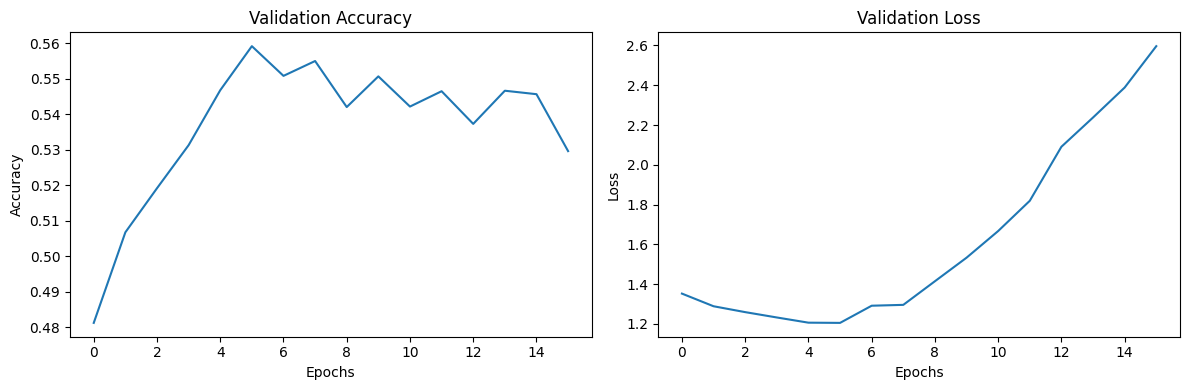

In [9]:
# Plot the validation accuracy and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['val_accuracy'])
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['val_loss'])
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.tight_layout()
plt.show()

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the directory containing the test dataset
test_dir = './data/test'

# Define the parameters
input_shape = (48, 48, 3)  # Adjust based on your dataset
num_classes = 7  # Number of emotion classes in your dataset
batch_size = 32

# Data preprocessing
datagen = ImageDataGenerator(rescale=1./255)

# Load the test dataset
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Set shuffle to False for test data
)

# Load the best model
model = tf.keras.models.load_model('./best_model/best_model_third.h5')

# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_generator, verbose=1)

print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


Found 7178 images belonging to 7 classes.
225/225 [==============================] - 3s 11ms/step - loss: 1.2026 - accuracy: 0.5549
Test Loss: 1.2025574445724487
Test Accuracy: 0.5548899173736572
